In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import pickle
from dask.diagnostics import ProgressBar
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rides = pd.read_csv('./riders_clean.csv')

In [3]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29187597 entries, 0 to 29187596
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   index               int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    int64  
 7   end_station_name    object 
 8   end_station_id      int64  
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
 14  year                int64  
 15  start_date          object 
 16  stop_date           object 
 17  start_hour          int64  
 18  stop_hour           int64  
 19  start_min           int64  
 20  stop_min            int64  
 21  month               int64  
 22  season              int64  
 23  dayofweek           int64  
 24  tripduration        fl

In [4]:
rides['started_at'] = pd.to_datetime(rides['started_at'])
rides['date'] = rides['started_at'].dt.strftime('%Y-%m-%d')
rides['date'] = pd.to_datetime(rides['date'])
rides['month'] = rides['date'].dt.strftime('%Y-%m')
rides['year'] = rides['date'].dt.strftime('%Y')
rides['month3'] = rides['date'].dt.strftime('%Y-%m')

In [5]:
rides['month2'] = rides.started_at.dt.month.apply(lambda x: 'Jan' if x == 1 else 'Feb' if x == 2 else \
    'Mar' if x == 3 else 'Apr' if x == 4 else 'May' if x == 5 else 'Jun' if x == 6 else 'Jul' if x == 7 else \
    'Aug' if x == 8 else 'Sep' if x == 9 else 'Oct' if x == 10 else 'Nov' if x == 11 else 'Dec' )

In [6]:
rides['month3'] = rides['date'].dt.strftime('%m')

In [7]:
monthly = rides.groupby(['year','month3'])[['month3']].count().rename(columns={'month3':'counts'}).reset_index()

In [8]:
monthly['month3'] = monthly['month3'].astype(int)


In [9]:
monthly['month2'] = monthly.month3.apply(lambda x: 'Jan' if x == 1 else 'Feb' if x == 2 else \
    'Mar' if x == 3 else 'Apr' if x == 4 else 'May' if x == 5 else 'Jun' if x == 6 else 'Jul' if x == 7 else \
    'Aug' if x == 8 else 'Sep' if x == 9 else 'Oct' if x == 10 else 'Nov' if x == 11 else 'Dec' )

In [10]:
monthly['counts_mil'] = monthly['counts'] / 1000000

In [11]:
monthly

,year,month3,counts,month2,counts_mil
0,2021,7,3070503,Jul,3.070503
1,2021,8,3058726,Aug,3.058726
2,2021,9,3264737,Sep,3.264737
3,2021,10,3057530,Oct,3.057530
4,2021,11,2151272,Nov,2.151272
5,2021,12,1739599,Dec,1.739599
6,2022,1,1043131,Jan,1.043131
7,2022,2,1231329,Feb,1.231329
8,2022,3,1891488,Mar,1.891488
9,2022,4,2316955,Apr,2.316955


Text(0, 0.5, 'Number of Bike Rides (Million)')

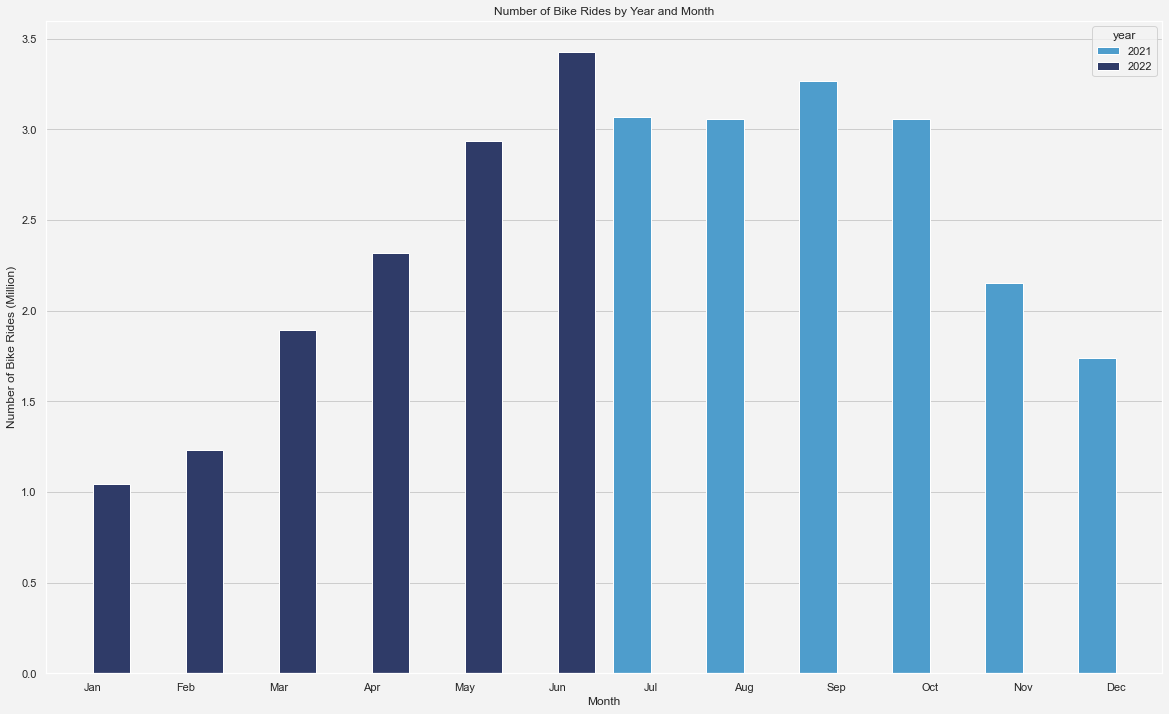

In [12]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#39a2e1","#263571","#343335","#7a6155","#574746","#60645f","#8e8c8e","#ea2029","#ea2029","#263571","#263571","#263571"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (20,12))
fig = sns.barplot(x = 'month2', y = 'counts_mil', hue = 'year', data = monthly, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',\
                                                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],\
                 ci = False)
fig.set_title('Number of Bike Rides by Year and Month', fontsize=12)
fig.set_xlabel('Month', fontsize=12)
fig.set_ylabel('Number of Bike Rides (Million)', fontsize=12)

#### Basic summary data

In [13]:
rides['day'] = rides['date'].dt.strftime('%d')

In [14]:
daily = rides.groupby(['day'])[['tripduration']].mean().rename(columns={'tripduration':'average'}).reset_index()

In [15]:
dailyrides = rides.groupby(['date'])[['date']].count().rename(columns={'date':'count'}).reset_index()

In [17]:
rides['day_of_week'] = rides['started_at'].dt.day_name()
rides['datehour'] = rides['started_at'].dt.hour

In [18]:
weekday_hourly = rides.groupby(['day_of_week','datehour']).size().reset_index(name='total_rides')


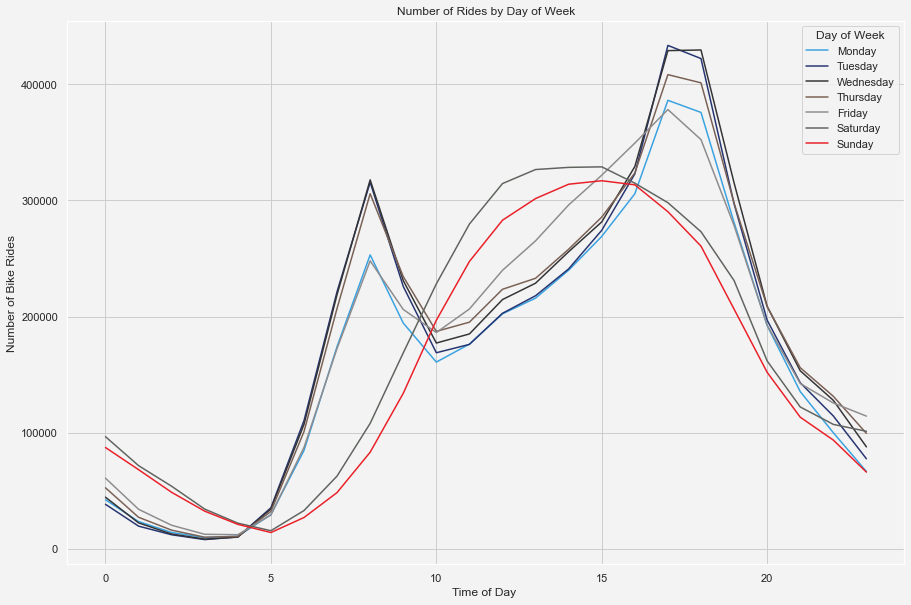

In [20]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#39a2e1","#263571","#343335","#7a6155","#8e8c8e","#60645f","#ea2029"]
plt.subplots(figsize = (15,10))
sns.set_palette(sns.color_palette(colors))
fig = sns.lineplot(x="datehour", y="total_rides", data = weekday_hourly, hue="day_of_week",
            hue_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], legend = False)
fig.set_title('Number of Rides by Day of Week', fontsize=12)
fig.set_xlabel('Time of Day ', fontsize=12)
fig.set_ylabel('Number of Bike Rides', fontsize=12)
plt.legend(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
           title = 'Day of Week')